# Importing all the libraries:


In [98]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore

# Loading the csv file:

In [99]:
 bank_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [100]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Checking the type of all the columns:

In [101]:
bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [102]:
#loading all the columns.

In [8]:
bank_df.columns = ["ID","Age","Experience","Income","ZIP Code","Family","CCAvg","Education","Mortgage","Personal Loan","Securities Account","CD Account","Online","CreditCard"]

In [103]:
#Checking for negative values:
bank_df[bank_df['Experience']<0].count()

ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [104]:
#Converting negative values into positive:
bank_df['Experience']= bank_df['Experience'].abs()

In [105]:
#Validating negactive values:
bank_df[bank_df['Experience']<0].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
#checking the statistics of the data file

In [106]:
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Observations on the given data file:

In [107]:
#pair plots

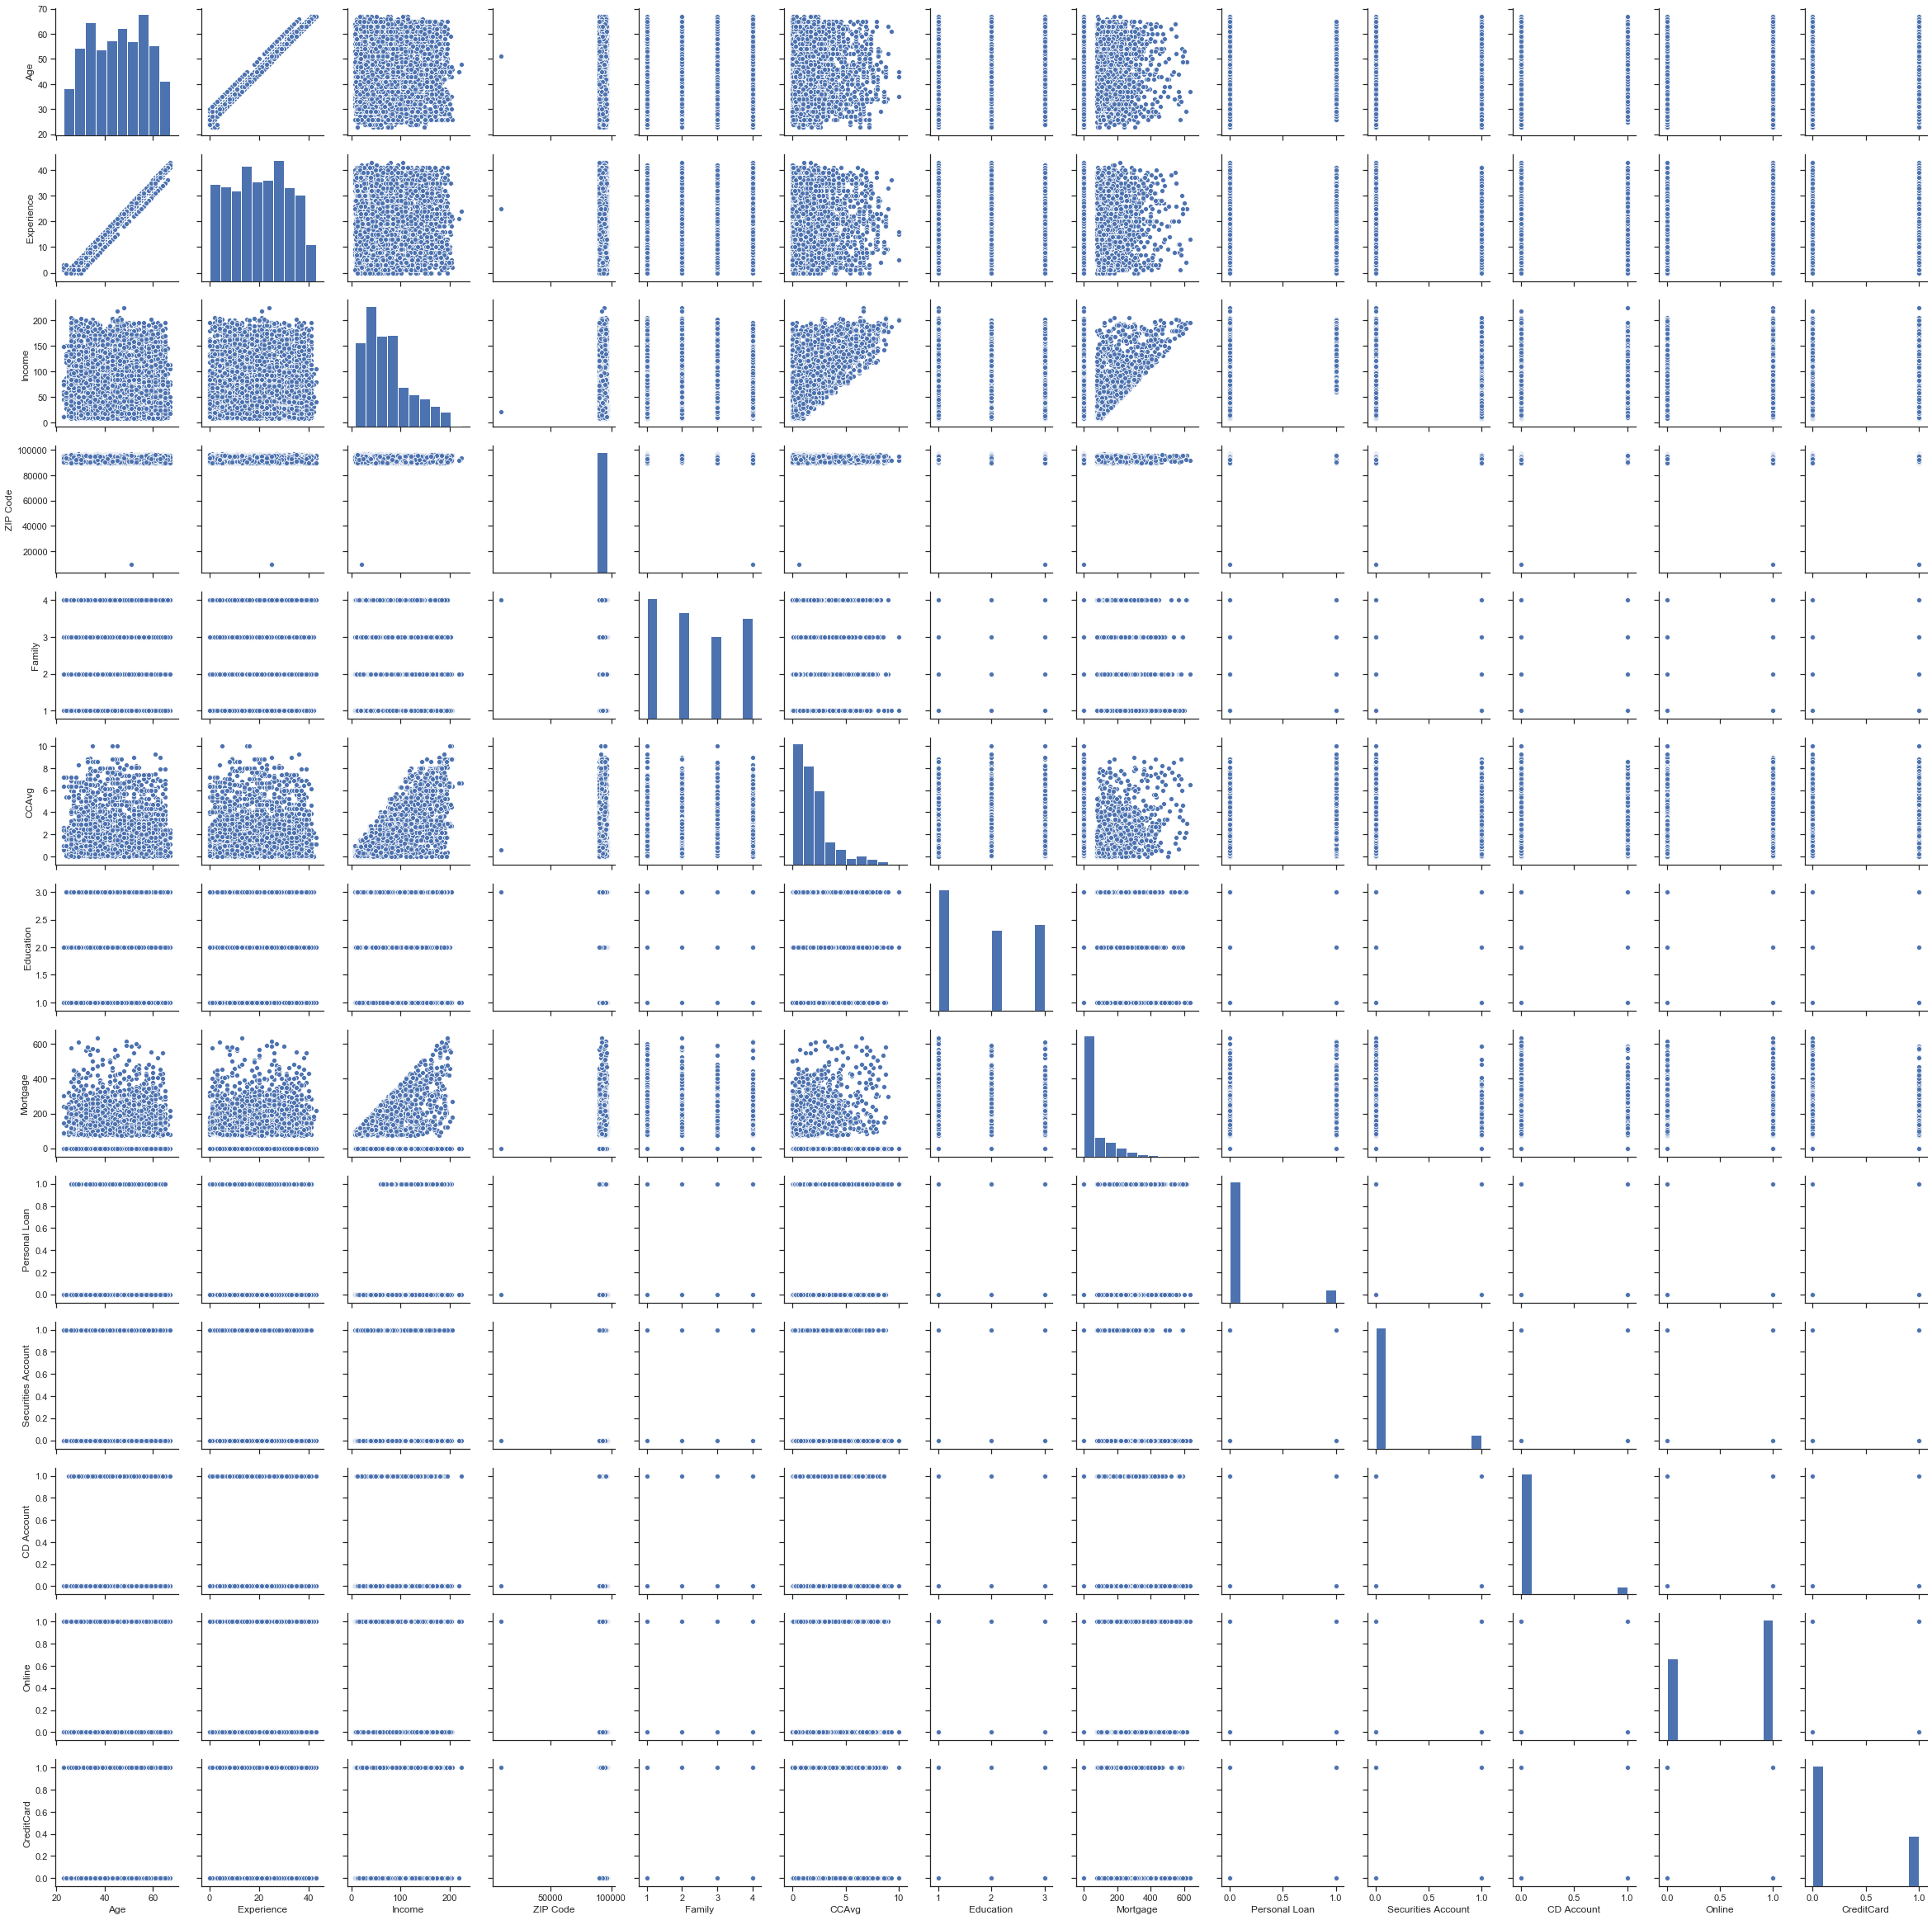

In [108]:
plt = sns.pairplot(bank_df[['Age','Experience','Income','ZIP Code','Family','CCAvg' ,'Education' , 'Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']] )

Age and experience are highly correlated.


In [109]:
#Box plots

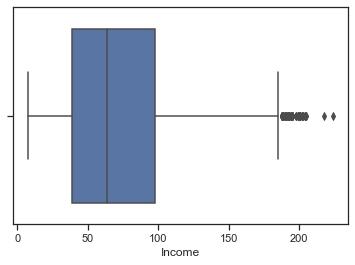

In [110]:
plt = sns.boxplot(bank_df['Income'])

In [111]:
#Dist plots

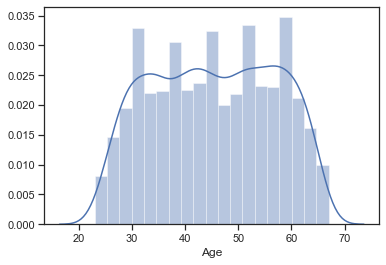

In [112]:
sns.distplot(bank_df['Age'])

# Observation:

#Most of the customers age fall in the age range of 30 to 60 yrs.
#Most of customers have experience in the range of 5 to 35 years 
#Most earn an income between 10K to 100K.

# Influence of eduaction on person taking personal loan:

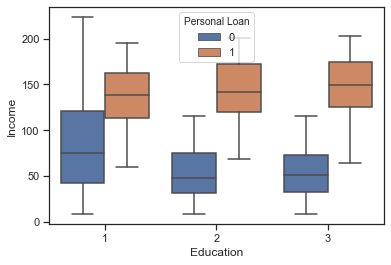

In [114]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data= bank_df)


Observation:

The box plots show that those with education level 1 have higher incomes. But customers who go for personal loans have the same income distribution regardless of the education level.

# Influence of mortgage on personal loan

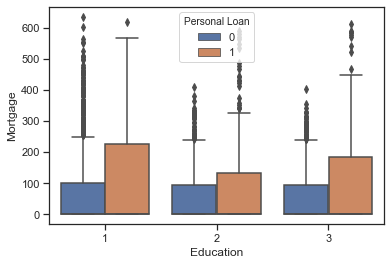

In [115]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data= bank_df)


Observation:

Customers who taken loan also have higher mortgages.

# Influence of family size on personal loan:

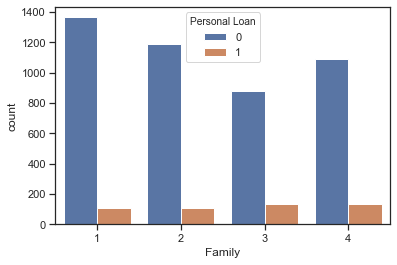

In [116]:
sns.countplot(x="Family", data=bank_df, hue="Personal Loan")


Observation:

Family size does not have any influence on a person taking persoanl loan

# Relationship between personal loan and securities account, credit card and CDaccount

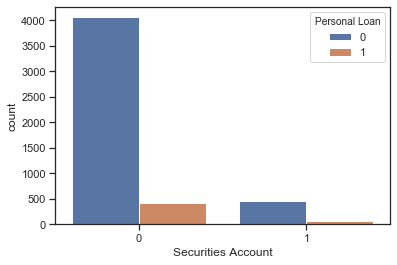

In [117]:
sns.countplot(x="Securities Account", data=bank_df,hue="Personal Loan")


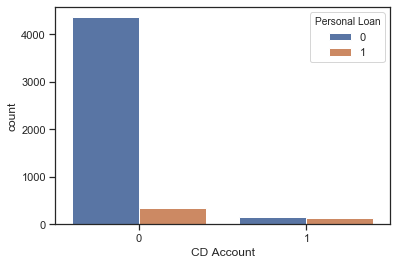

In [118]:
sns.countplot(x="CD Account", data=bank_df,hue="Personal Loan")


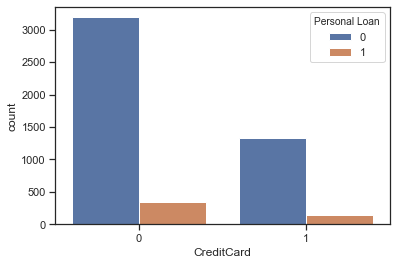

In [119]:
sns.countplot(x="CreditCard", data=bank_df,hue="Personal Loan")


Observation:

Customers who have taken personal loan have higher credit card average than those who did not take it.

Customers who have taken personal loan have more CD account and Securities account than those who did not take it.


# People taking personal loan and there income distribution:

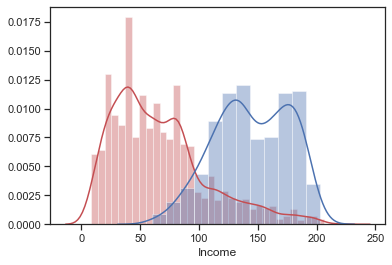

In [120]:
sns.distplot( bank_df[bank_df['Personal Loan'] == 0]['Income'], color = 'r')
sns.distplot( bank_df[bank_df['Personal Loan'] == 1]['Income'], color = 'b')

# People taking personal loan and there income distribution:

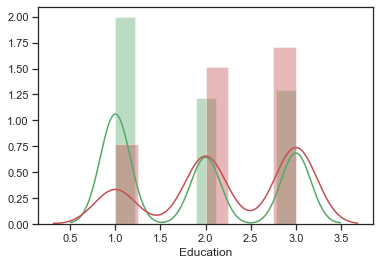

In [121]:
sns.distplot( bank_df[bank_df['Personal Loan'] == 0]['Education'], color = 'g')
sns.distplot( bank_df[bank_df['Personal Loan'] == 1]['Education'], color = 'r')

# Modelling:

In [158]:
from sklearn.model_selection import train_test_split
bank1 = bank_df.drop(['ID' , 'Experience', 'ZIP Code', 'Personal Loan'], axis=1)
x = np.array(bank1)
y = np.array(bank_df['Personal Loan'])

In [159]:
x.shape

(5000, 10)

In [160]:
y.shape

(5000,)

#Splitting data in test and train

In [161]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)  

# K- Nearest neighbour -

In [162]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=7)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [163]:
y_pred = classifier.predict(X_test)

In [164]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[1333   30]
 [  85   52]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1363
           1       0.63      0.38      0.47       137

    accuracy                           0.92      1500
   macro avg       0.79      0.68      0.72      1500
weighted avg       0.91      0.92      0.91      1500



In [165]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9233333333333333

In [166]:
bank1.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


# Naive Bayes - 

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [170]:
from sklearn.model_selection import train_test_split
bank1 = bank_df.drop(['ID' , 'Experience', 'ZIP Code','Personal Loan' ], axis=1)
x = np.array(bank1)
y = np.array(bank_df['Personal Loan'])

In [171]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 7)  

In [172]:
model = GaussianNB()
model.fit(X_train, y_train)

print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [173]:
# make predictions
y_predict = model.predict(X_test)

In [174]:
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1357
           1       1.00      1.00      1.00       143

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

[[1357    0]
 [   0  143]]


In [175]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8793333333333333


# Logistic Regression - 

In [176]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9533333333333334
[[1347   15]
 [  55   83]]


C:\Users\bajpaig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# OBSERVATION :-

We used three different alogorithms to determine the accuracy rate and the highest accuracy is given by Logistic Regression which is near to 95.333.

Which means we can choose the " Logistic Regression model" for our final modelling.

True Positives (TP): we correctly predicted that they will take loan - 83

True Negatives (TN): we correctly predicted that they will not take loan - 1347

False Positives (FP): we incorrectly predicted that they will take loan (a "Type I error") 15 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they will not take loan (a "Type II error") 55 Falsely predict negative Type II error